In [1]:
import os
os.getcwd()

'/home/michel/Desktop/note of m1/Python programming/TENSILE PROJECT'

# Project title: European electrical network

### Description

In this project we are going to look at the electricity production of a part of the European countries. We are going to use the data containing the time series of the “power imbalance” for the month of January 2017 of a number of European countries. 

For this project we will have to study the graph of the European electrical network. For this we
will first study the following graph:

<img src="Elc.png" width="250" height="250">

### The first step in any python program is importing necessary modules/libraries into the code.

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Construct the adjacency matrix of the graph defined above. In graph theory the adjacency matrix is a symmetric square matrix. The elements of this matrix indicate which pair of nodes are adjacent in the graph.

#### adjacent matrixdimensional array that shows whether there is a relationship between two objects



In [3]:
# G = (V,E) Graph with vertices/nodes V and edges/arcs E

from collections import namedtuple # Importing a factory function for creating tuple subclasses from the module "collections"
""" name tuples are great  for creating blueprints  that can use to instantiate new
object we can use tuple but we prefer to use named tuples instead because it is fast 
With namedtuples you don’t have to use integer indexes for accessing members of a tuple"""



Graph = namedtuple("Graph", ["nodes", "edges"]) # Creating our graph/network

""" we start to assigning a named tuple to the named graph  with capital G
the  first we have to pass to namedtuples is a string containing the name
of of type which for us just graph with capital G, next thing we have to pass to namedtuple
is a string or an iterable containg  the field names, now we prefer to us
a terable like a list with strings containg the field names these will be 
the names  of the components of the tuple for the graph that would be vertices
and edge"""

nodes = [0, 1, 2, 3, 4, 5]
edges = [(0, 1), (1,2), (1, 4), (1, 5), (2,3), (2, 4), (3, 4), (4,5)]

G = Graph(nodes, edges) # Our given european electrical network

# print(G) # Printing our european electrical network

def adjacency_matrix(graph): # This function will take only one parameter a graph
    """
    Return the adjacency matrix of the graph.
    
    """
    
    Matrix = [[0 for node in graph.nodes] for node in graph.nodes] # Initialization of our matrix with zeros
    """ we will  use a python list to represent   the adjecency matrix
     and ti will assign it to variable  colled matrix since the adjacency 
     is two_dimensional array each element  of this list will be another list
     representing each row in the adjacency matrix, we need one for each node in 
     in the graph it's going to be really useful to initialize each entry in matrix  with zero."""  
    
    
    
    
    for edge in graph.edges:# let's loop each edge of the graph add the values
        #as necessary
        """  the first thing we will do is to extract  the two nodes in the edge 
        and assign them to variables colled "i" node "j" in order to record this
        edge in the adjacency matrix we need to add 1 to the  0 in the row 
        corresponding to "i" and the column corresponding  to "j".
         """
        i = edge[0]             # First node/vertice of each edge
        j = edge[1]             # Second node/vertice of each edge
        Matrix[i][j] += 1       # Updating our matrix by forward edge direction
        Matrix[j][i] += 1       # Updating our matrix by backward edge direction
        
    return np.array(Matrix)     # Returning our matrix as an array.

graph = G

adjacency_matrix = adjacency_matrix(graph) 

print('The adjacent matrix M is:\n\n', adjacency_matrix)
   

The adjacent matrix M is:

 [[0 1 0 0 0 0]
 [1 0 1 0 1 1]
 [0 1 0 1 1 0]
 [0 0 1 0 1 0]
 [0 1 1 1 0 1]
 [0 1 0 0 1 0]]


### 2. Determine the degree, denoted $k_n$, of each node in the graph. In graph theory the degree of a node is the number of segments connecting this node.
###### In few word we can define degree of node as the sum of each row in adjecent matrix


In [4]:
def degree(graph):   # Function with input graph and return a list of degree for each node (0,1,2,3,4,5)
    kn = []# initialize empty list
    for i in range(adjacency_matrix.shape[0]):
        degree = np.sum(adjacency_matrix[i])
        kn.append(degree)
        print('Node',i, 'has degree', kn[i])
    return kn

graph = G

degree_kn = degree(adjacency_matrix)

print("\n#####################################################\n")

print("List of degree for each node kn = ", degree_kn)


Node 0 has degree 1
Node 1 has degree 4
Node 2 has degree 3
Node 3 has degree 2
Node 4 has degree 4
Node 5 has degree 2

#####################################################

List of degree for each node kn =  [1, 4, 3, 2, 4, 2]


### 3. Determine the incidence matrix $K$ of the graph. We will assume that the segments are always oriented from the lowest value node to the highest value node (nodes 2 to 3 and not 3 to 2). The incidence matrix in graph theory is defined as a matrix $n \times m$ with $n$ the number of nodes and $m$ the number of segments. This matrix is such that $k_{ij}= 1$  and $k_{ji}= 0$ if node $i$ and segment $j$ are linked and $0$ otherwise.

##### For incident matrix we consider both cases  where $k_{ij}= 1$  and $k_{ji}= 0$.









In [5]:
def incidence_matrix1(graph):  
    """
    Input a graph
    
    Return the incidence matrix of the graph.

    """ 

    assert all(i in graph.nodes and j in graph.nodes for i, j in graph.edges) 

    incidence_matrix_K = np.zeros([max(graph.nodes)+1, len(graph.edges)]) # Initialization of incidence matrix K (With size #V by #E) with zeros
    
    for k, edge in enumerate(graph.edges): 
        i, j = edge
        incidence_matrix_K[i][k] = 1
        incidence_matrix_K[j][k] = 0
    return incidence_matrix_K

graph = G

K = incidence_matrix1(graph)

print('The incidence matrix K:\n\n', K)

The incidence matrix K:

 [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


### 3. Determine the incidence matrix $K$ of the graph. We will assume that the segments are always oriented from the lowest value node to the highest value node (nodes 2 to 3 and not 3 to 2). The incidence matrix in graph theory is defined as a matrix $n \times m$ with $n$ the number of nodes and $m$ the number of segments. This matrix is such that $k_{ij}= 1$  and $k_{ji}= -1$ if node $i$ and segment $j$ are linked and $0$ otherwise.

##### Here we preferred to consider $k_{ij}= 1$  and $k_{ji}= -1$  because  for the case $k_{ij}= 1$  and $k_{ji}=0$ we got the matrix which has that last column of zero entries  and it's invertible


In [6]:
def incidence_matrix(graph):  
    """
    Input a graph
    
    Return the incidence matrix of the graph.

    """ 

    assert all(i in graph.nodes and j in graph.nodes for i, j in graph.edges) 

    incidence_matrix_K = np.zeros([max(graph.nodes)+1, len(graph.edges)]) # Initialization of incidence matrix K (With size #V by #E) with zeros
    
    for k, edge in enumerate(graph.edges): 
        i, j = edge
        incidence_matrix_K[i][k] = 1
        incidence_matrix_K[j][k] = -1
    return incidence_matrix_K

graph = G

K = incidence_matrix(graph)

print('The incidence matrix K:\n\n', K)

The incidence matrix K:

 [[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  1.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  1.  0.]
 [ 0.  0. -1.  0.  0. -1. -1.  1.]
 [ 0.  0.  0. -1.  0.  0.  0. -1.]]


### 4. Define the Laplacian of the graph. The Laplacian of the graph is defined in two ways:

- 4.1 $L = K*K^T$

- 4.2 The difference between the diagonal matrix of the degrees of the nodes (the kn of question 2 put on a diagonal matrix) and the adjacency matrix.

  #### 4.1 $L = K*K^T$

In [7]:
L = K @ K.T
print("Laplacian of the graph is L =\n\n", L)

Laplacian of the graph is L =

 [[ 1. -1.  0.  0.  0.  0.]
 [-1.  4. -1.  0. -1. -1.]
 [ 0. -1.  3. -1. -1.  0.]
 [ 0.  0. -1.  2. -1.  0.]
 [ 0. -1. -1. -1.  4. -1.]
 [ 0. -1.  0.  0. -1.  2.]]


#### 4.2 The difference between the diagonal matrix of the degrees of the nodes (the kn of question 2 put on a diagonal matrix) and the adjacency matrix.

In [8]:
D = np.diag(np.array(degree_kn)) # Diagonal matrix of the degrees of the nodes
L1 = D - adjacency_matrix
print("Laplacian of the graph is L =\n\n", L1)

Laplacian of the graph is L =

 [[ 1 -1  0  0  0  0]
 [-1  4 -1  0 -1 -1]
 [ 0 -1  3 -1 -1  0]
 [ 0  0 -1  2 -1  0]
 [ 0 -1 -1 -1  4 -1]
 [ 0 -1  0  0 -1  2]]


In [9]:
L == L1 # Testing both methods 

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

## 5. We will now identify the nodes of our graph to some European countries 0=DK, 1=DE, 2=CH, 3=IT, 4=AT, 5=CZ . The power flow between countries can then be defined as follows:

$p_i = \sum_j \tilde{L}_{i,j}\theta_j$ et $f_l = \frac{1}{x_l}\sum_i K_{i,l}\theta_i$, where $\tilde{L}_{i,j} = \sum_l K_{i,l}\frac{1}{x_l}K_{j,l}$

is the weighted Laplacian matrix. To simplify the problem we will assume that $x_l=1$. From the data provided in the imbalance.csv file determine the values of $\theta_j$ for the first hour of January 1, 2017 and the values of $f$ . For this, we will make the assumption that $\theta_0=0$.

In [10]:
df = pd.read_csv("imbalance.csv")
df
# df.head()
# df.tail()

,DateTime,DK,DE,CH,IT,AT,CZ
0,2017-01-01 00:00:00,-79.73,3486.25,-3403.37,-97.5,-2867.33,2961.68
1,2017-01-01 01:00:00,-109.14,4248.17,-3829.59,-105.9,-3149.98,2946.44
2,2017-01-01 02:00:00,-101.49,5314.56,-4131.66,-199.2,-3646.87,2764.66
3,2017-01-01 03:00:00,-197.96,5450.71,-4009.61,-656.0,-3345.56,2758.42
4,2017-01-01 04:00:00,-526.15,5695.72,-3924.43,-646.2,-3393.12,2794.18
...,...,...,...,...,...,...,...
739,2017-01-31 19:00:00,589.65,3452.07,-958.44,-1462.5,-2182.67,561.89
740,2017-01-31 20:00:00,592.88,5087.10,-1680.11,-2055.7,-2891.40,947.23
741,2017-01-31 21:00:00,595.62,5905.14,-2259.94,-1816.4,-3520.59,1096.17
742,2017-01-31 22:00:00,590.15,6165.33,-2518.73,-1846.7,-3665.70,1275.65


In [11]:
# convert the column (it's a string) to datetime type
datetime_series = pd.to_datetime(df['DateTime'])

# create datetime index passing the datetime series
datetime_index = pd.DatetimeIndex(datetime_series.values)

df1=df.set_index(datetime_index)

# we don't need the column anymore
df1.drop('DateTime',axis=1,inplace=True)

df1

,DK,DE,CH,IT,AT,CZ
2017-01-01 00:00:00,-79.73,3486.25,-3403.37,-97.5,-2867.33,2961.68
2017-01-01 01:00:00,-109.14,4248.17,-3829.59,-105.9,-3149.98,2946.44
2017-01-01 02:00:00,-101.49,5314.56,-4131.66,-199.2,-3646.87,2764.66
2017-01-01 03:00:00,-197.96,5450.71,-4009.61,-656.0,-3345.56,2758.42
2017-01-01 04:00:00,-526.15,5695.72,-3924.43,-646.2,-3393.12,2794.18
...,...,...,...,...,...,...
2017-01-31 19:00:00,589.65,3452.07,-958.44,-1462.5,-2182.67,561.89
2017-01-31 20:00:00,592.88,5087.10,-1680.11,-2055.7,-2891.40,947.23
2017-01-31 21:00:00,595.62,5905.14,-2259.94,-1816.4,-3520.59,1096.17
2017-01-31 22:00:00,590.15,6165.33,-2518.73,-1846.7,-3665.70,1275.65


### 5.1 The values of $\theta_j$ for the first hour of January 1, 2017. For this, we will make the assumption that $\theta_0=0$.

We have to solve a system of six linear equations and six variables ($\Theta$) given by $$L \Theta = P,$$

where $\Theta = (\theta_0=0, \theta_1, \theta_2, \theta_3, \theta_4, \theta_5)^T$ and $P = (p_0, p_1,p_2,p_3,p_4,p_5)^T$ (we consider $p_j$ as the power imbalance given in the data with $j=0,...,5$ correspond to the nodes/countries). Since $\theta_0=0$ is given, we will end up with a system of six linear equations and five variables which leads us to use least square method to solve it. 

Hence, 

$$L_{new} \Theta_{new} = P$$\
$$\Theta_{new} = (L_{new}^T * L_{new})^{-1} * L_{new}^T * P,$$

where $L_{new}$ is given by removing/deleting the first column of Laplacian matrix (L) and $\Theta_{new}=(\theta_1, \theta_2, \theta_3, \theta_4, \theta_5)^T$. 

In [12]:
L_new = np.delete(L,0,1) # We need to delete the first column of the Laplacian matrix since it will be multiplied by theta_0 = 0. 

P = df1.iloc[0].values # Extracting the first low coresponding with the first hour of January 1, 2017 (2017-01-01 00:00:00)

Theta_new = np.linalg.inv(L_new.T @ L_new) @ L_new.T @ P

Theta = np.insert(Theta_new, 0, 0) # Inserting theta_zero in the theta values

print("The values of theta are:\n\n", Theta)

The values of theta are:

 [    0.            79.73       -2302.97857143 -1995.25809524
 -1590.03761905   725.68619048]


### 5.2 The values of $f$ for the first hour of January 1, 2017.

$$f_l = \sum_i K_{i,l}\theta_i,$$

this implies that $$f = K^T * \Theta.$$

In [13]:
f = K.T @ Theta

print("The values of f are:\n\n", f)

The values of f are:

 [  -79.73        2382.70857143  1669.76761905  -645.95619048
  -307.72047619  -712.94095238  -405.22047619 -2315.72380952]


## 6. Determine the average power flow between countries over the month of January 2017.

In [14]:
def power_flow(data):
    
    # convert the column (it's a string) to datetime type
    datetime_series = pd.to_datetime(data['DateTime'])

    # create datetime index passing the datetime series
    datetime_index = pd.DatetimeIndex(datetime_series.values)

    df2 = data.set_index(datetime_index)

    # we don't need the column anymore
    df2.drop('DateTime',axis=1,inplace=True)

    fl = []
    for row in range(len(df2.index)):

        p_row = df2.iloc[row,: ].values
        
        Theta_new = np.linalg.inv(L_new.T @ L_new) @ L_new.T @ p_row
        
        Theta = np.insert(Theta_new, 0, 0) 
        
        Power_Flow = list(K.T @ Theta)
        fl.append(Power_Flow)
    Fl = np.array(fl)
    Mean_Power_flow = np.around(np.mean(Fl, axis=0), decimals=2)

    for k, edge in enumerate(graph.edges): 

        i, j = edge
#         print("The average power flow between country ",i," and country ",j,
#               " over the month of January 2017 is ",Mean_Power_flow[k])

    return Mean_Power_flow

data = df

Mean_power_flow = power_flow(data)

AvPf_df = pd.DataFrame({'From Country':['DK','DE','DE','DE','CH','CH','IT','AT'],
                        'To country':['DE','CH','AT','CZ','IT','AT','AT','CZ'],
                        'AvPowerFlow(Jan2017)':Mean_power_flow})
AvPf_df

,From Country,To country,AvPowerFlow(Jan2017)
0,DK,DE,451.02
1,DE,CH,2402.42
2,DE,AT,2124.95
3,DE,CZ,426.47
4,CH,IT,421.12
5,CH,AT,-277.47
6,IT,AT,-698.59
7,AT,CZ,-1698.48


# Bonus

### For information there is what is needed in python to very easily pieces of map at random europe and draw information on it….

## It can't be possible to bring map because our data have not longitude and latitude.


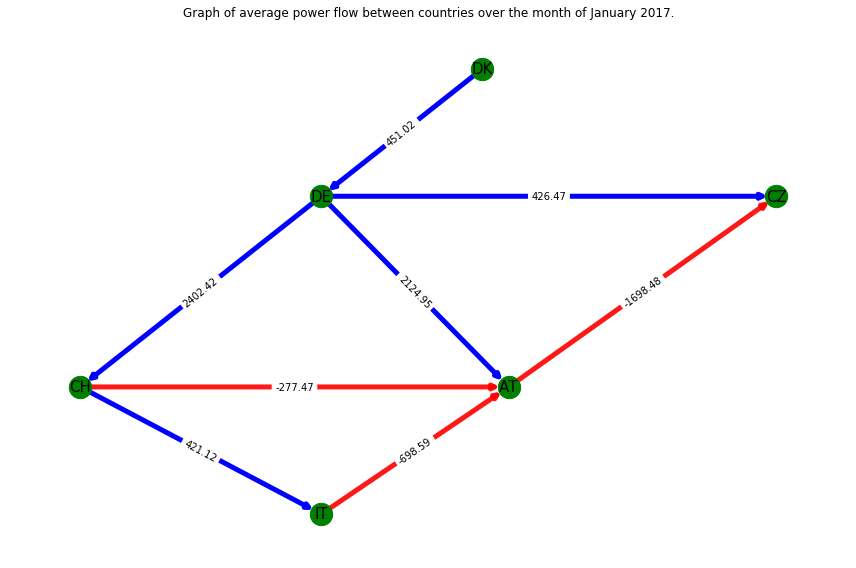

In [15]:
DG = nx.DiGraph(directed=True)

weights = Mean_power_flow

Edges = [('DK','DE'), ('DE','CH'), ('DE','AT'), ('DE','CZ'), ('CH','IT'), 
         ('CH','AT'), ('IT','AT'), ('AT','CZ')]

for k, edge in enumerate(Edges): 
    i, j = edge
    DG.add_edge(i, j, weight=weights[k])

elarge = [(u, v) for (u, v, d) in DG.edges(data=True) if d["weight"] > 0]
esmall = [(u, v) for (u, v, d) in DG.edges(data=True) if d["weight"] <= 0]


plt.figure(figsize=(12,8))
# pos = nx.spring_layout(DG)  # positions for all nodes - seed for reproducibility
pos={'DK': np.array([9, 15]),'DE': np.array([3,5]),'CH': np.array([-6, -10]), 
     'IT': np.array([3,-20]), 'AT': np.array([10,-10]), 'CZ': np.array([20,5])}
# print(pos)

# nodes
nx.draw_networkx_nodes(DG, pos, node_size=500, node_color='g')

# edges
nx.draw_networkx_edges(DG, pos, edgelist=elarge, width=5, edge_color="b")
nx.draw_networkx_edges(DG, pos, width=5, edgelist=esmall, alpha=0.9, 
                       edge_color="r", style="dashed")

# node labels
nx.draw_networkx_labels(DG, pos, font_size=15)

# edge weight labels
edge_labels = nx.get_edge_attributes(DG, "weight")

nx.draw_networkx_edge_labels(DG, pos, edge_labels)

ax = plt.gca()
# ax.margins(0.001)
plt.title("Graph of average power flow between countries over the month of January 2017.")
plt.axis("off")
plt.tight_layout()
plt.show()

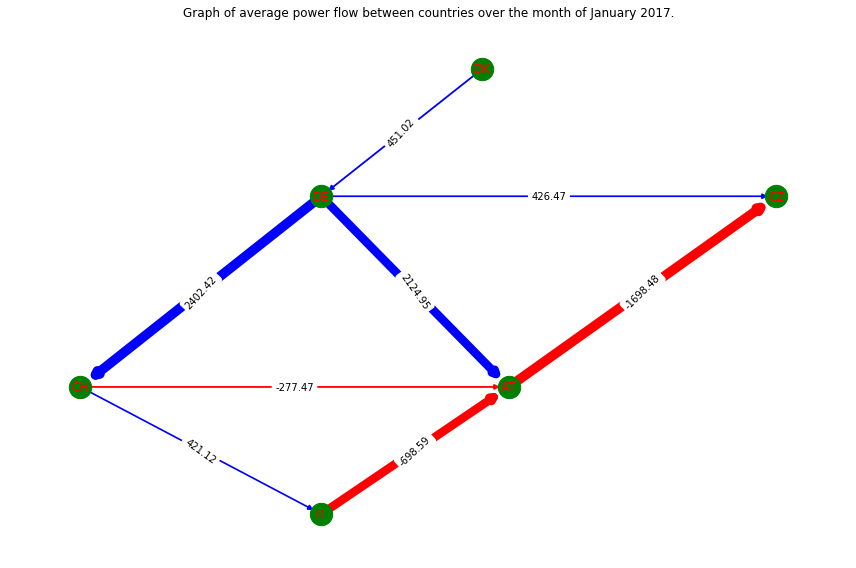

In [16]:
weight = [str(2*i/500) for i in list(AvPf_df['AvPowerFlow(Jan2017)'].values)]

df_wdg = pd.DataFrame({'From Country':['DK','DE','DE','DE','CH','CH','IT','AT'],
                       'To Country':['DE','CH','AT','CZ','IT','AT','AT','CZ'],'weight':weight})


G=nx.from_pandas_edgelist(df_wdg, 'From Country', 'To Country', edge_attr='weight', 
                          create_using=nx.DiGraph())


widths = nx.get_edge_attributes(G, 'weight')

nodelist = G.nodes()

d = [float(x) for x in list(widths.values())]

for k, edge in enumerate(G.edges): 
    node1, node2 = edge
    G.add_edge(node1, node2, weight=d[k])

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0]


plt.figure(figsize=(12,8))

nx.draw_networkx_edge_labels(DG, pos, edge_labels)


# pos = nx.shell_layout(G)
pos={'DK': np.array([9, 15]),'DE': np.array([3,5]),'CH': np.array([-6, -10]), 'IT': np.array([3,-20]),
     'AT': np.array([10,-10]), 'CZ': np.array([20,5])}

# nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='g')


nx.draw_networkx_edges(G,pos,edgelist =elarge , width=list(widths.values()),edge_color='b',alpha=1)
nx.draw_networkx_edges(G,pos,edgelist =esmall , width=list(widths.values()),edge_color='r',alpha=1, 
                       style="dashed") 

nx.draw_networkx_labels(G, pos=pos,labels=dict(zip(nodelist,nodelist)),font_color='r')

# plt.box(False)
ax = plt.gca()
# ax.margins(0.001)
plt.title("Graph of average power flow between countries over the month of January 2017.")
plt.axis("off")
plt.tight_layout()
plt.show()